# Time Series analysis 

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [3]:
#function for plotting series

def plot_series(time, series, format = "-", start = 0, end = None, label = None):
  plt.plot(time[start:end],series[start: end],format, label = label)
  plt.xlabel("Time")
  plt.ylabel("Value")
  if label:
    plt.legend(fontsize = 14)
  plt.grid(True)

# Plotting Trend and Sesionality

In [4]:
def trend(time, slope = 0):
  return time * slope

# Upward trending time series

In [5]:
time = np.arange(4 * 365 + 1)
baseline = 10
series = trend(time, 0.1)

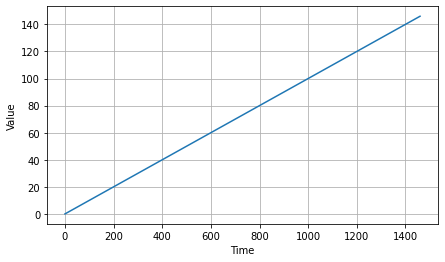

In [6]:
plt.figure(figsize=(7,4))
plot_series(time, series)
plt.show()

# Time Series Sesional Pattern

In [7]:
def sesional_pattern(seasonal_time):
  return np.where(seasonal_time < 0.4, np.cos(seasonal_time * 2 * np.pi), 1 / np.exp(3 * seasonal_time))

  #an arbitary pattern 

In [8]:
def seasonality(time, period, amplitude, phase = 0):
  # repeats after same pattern after each period
  season_time = ((time + phase) % period) / period
  return amplitude * sesional_pattern(season_time)

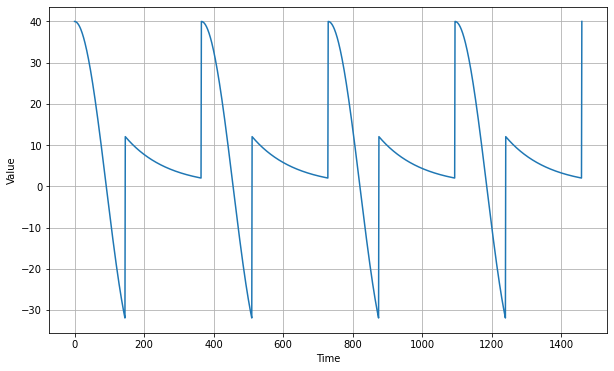

In [9]:
baseline = 10
amplitude = 40
series = seasonality(time, period=365, amplitude=amplitude)
plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

seasonality with upward and downward trends

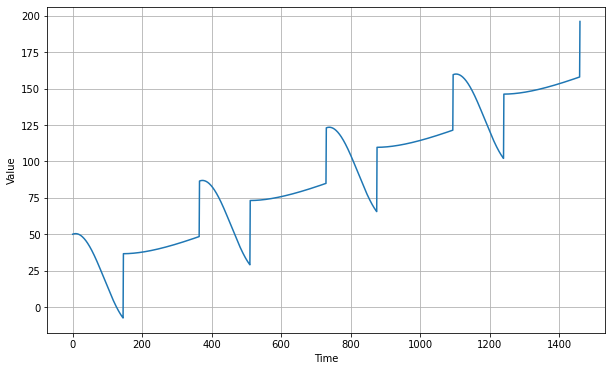

In [10]:
slope = 0.1
series = baseline + trend(time, slope) + seasonality(time, period = 365, amplitude= amplitude)
plt.figure(figsize=(10,6))
plot_series(time, series)
plt.show()

# Add Noise

few real-life time series have such a smooth signal. They usually have some noise, and the signal-to-noise ratio can sometimes be very low

In [11]:
# generating white noise

def white_noise(time, noise_level = 1, seed = None):
  rnd = np.random.RandomState(seed)
  return rnd.randn(len(time)) * noise_level

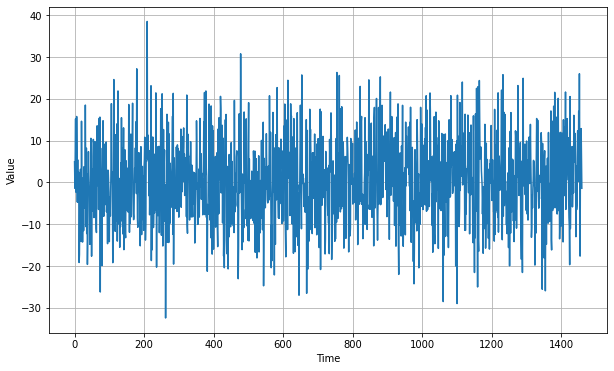

In [12]:
noise_level = 10
seed = 42
noise = white_noise(time, noise_level ,seed)
plt.figure(figsize=(10,6))
plot_series(time, noise)
plt.show()

Adding noise to time series

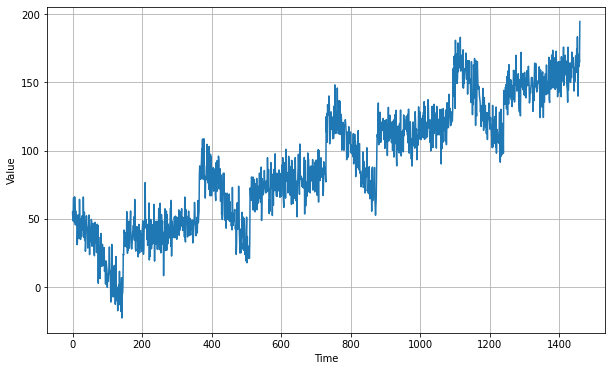

In [13]:
series += noise
plt.figure(figsize=(10,6))
plot_series(time, series)
plt.show()


# Forecasting

splitting it into two periods: the training period and the validation period (in many cases, you would also want to have a test period). The split will be at time step 1000.

In [14]:
split_time = 1000
train_time = time[: split_time]
x_train = series[: split_time]
validation_time = time[split_time :]
validation_train = series[split_time :]

# Autocorrelation

Autocorrelation, also known as serial correlation, is the correlation of a signal with a delayed copy of itself as a function of delay. Informally, it is the similarity between observations as a function of the time lag between them. The analysis of autocorrelation is a mathematical tool for finding repeating patterns, such as the presence of a periodic signal obscured by noise, or identifying the missing fundamental frequency in a signal implied by its harmonic frequencies. It is often used in signal processing for analyzing functions or series of values, such as time domain signals.

In [15]:
def autocorrelation(time, amplitude, seed = None):
  rnd = np.random.RandomState(seed)
  n1 = 0.5
  n2 = -0.1
  ar = rnd.randn(len(time) + 50)
  ar[: 50] = 100
  for steps in range(50, len(time)+ 50):
    ar[step] += n1 * ar[step - 50]
    ar[step] += n2 * ar[step - 33]
  return ar[50:] * amplitude

In [16]:
def autocorrelation(time, amplitude, seed=None):
    rnd = np.random.RandomState(seed)
    n = 0.8
    ar = rnd.randn(len(time) + 1)
    for step in range(1, len(time) + 1):
        ar[step] += n * ar[step - 1]
    return ar[1:] * amplitude

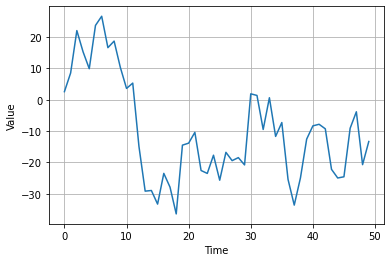

In [17]:
series = autocorrelation(time, 10, seed=42)
plot_series(time[:50], series[:50])
plt.show()

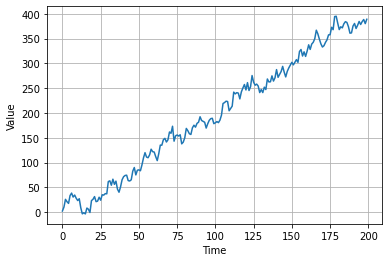

In [18]:
series = autocorrelation(time, 10, seed=42) + trend(time, 2)
plot_series(time[:200], series[:200])
plt.show()

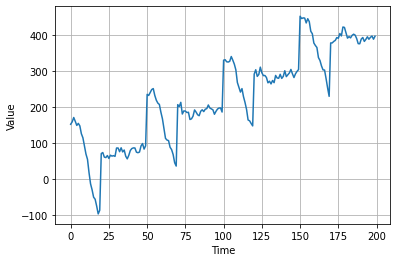

In [19]:
series = autocorrelation(time, 10, seed=42) + seasonality(time, period=50, amplitude=150) + trend(time, 2)
plot_series(time[:200], series[:200])
plt.show()

First  upward and then downward trend

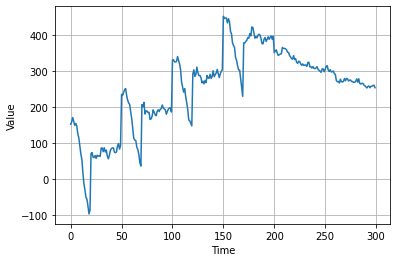

In [20]:
series = autocorrelation(time, 10, seed=42) + seasonality(time, period=50, amplitude=150) + trend(time, 2)
series2 = autocorrelation(time, 5, seed=42) + seasonality(time, period=50, amplitude=2) + trend(time, -1) + 550
series[200:] = series2[200:]
plot_series(time[:300], series[:300])
plt.show()

# Impulse Response

In [21]:
def impulse(time, num_impulses, amplitude = 1, seed = None):
  rnd = np.random.RandomState(seed)
  impulse_indices = rnd.randint(len(time), size = 10)
  series = np.zeros(len(time))
  for index in impulse_indices:
    series[index] += rnd.rand()*amplitude
  return series

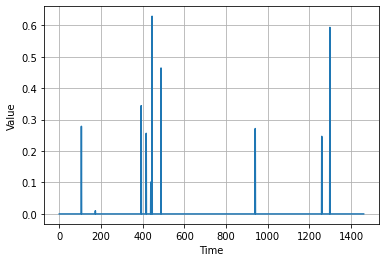

In [22]:
series = impulse(time, num_impulses= 10, seed = None)
plot_series(time, series)
plt.show()

In [23]:
def autocorrelation(source, ns):
  ar = source.copy()
  max_lag = len(ns)
  for step,value in enumerate(source):
    for lag, n in ns.items():
      if step - lag > 0:
        ar[step] += n * ar[step - lag]
  return ar

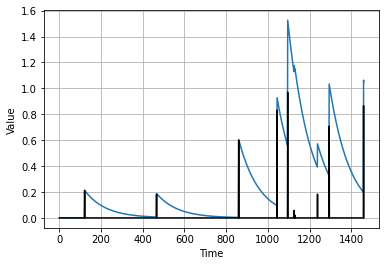

In [24]:
signal = impulse(time, 10, seed = 42)
series = autocorrelation(signal,{1 : .99})
plot_series(time, series)
plt.plot(time, signal, "k-")
plt.show()

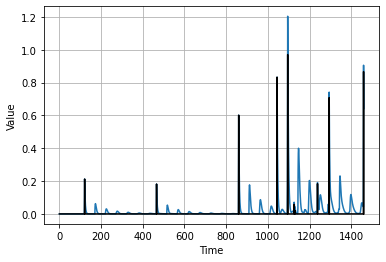

In [25]:
signal = impulse(time, 10,seed = 42)
series = autocorrelation(signal, {1 : 0.70 , 50 : 0.20})
plot_series(time, series)
plt.plot(time, signal, 'k-')
plt.show()

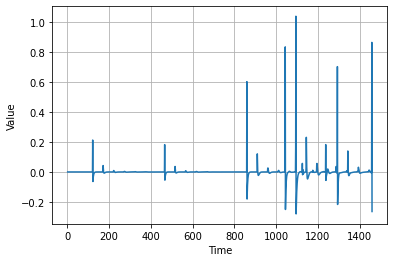

In [26]:
series_diff1 = series[1 :] - series[: - 1]
plot_series(time[1:],series_diff1)

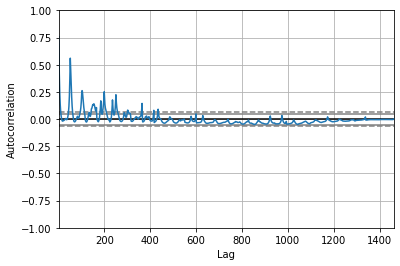

In [27]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)

In [28]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(series, order=(5, 1, 0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1460
Model:                 ARIMA(5, 1, 0)   Log Likelihood                2223.428
Method:                       css-mle   S.D. of innovations              0.053
Date:                Fri, 28 Aug 2020   AIC                          -4432.855
Time:                        16:08:42   BIC                          -4395.852
Sample:                             1   HQIC                         -4419.052
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.001      0.384      0.701      -0.001       0.002
ar.L1.D.y     -0.1235      0.026     -4.714      0.000      -0.175      -0.072
ar.L2.D.y     -0.1254      0.029     -4.333      0.0

In [29]:
df = pd.read_csv("/content/Sunspots.csv", parse_dates=["Date"], index_col="Date")
series = df["Monthly Mean Total Sunspot Number"].asfreq("1M")
series.head()

Date
1749-01-31     96.7
1749-02-28    104.3
1749-03-31    116.7
1749-04-30     92.8
1749-05-31    141.7
Freq: M, Name: Monthly Mean Total Sunspot Number, dtype: float64

In [30]:
!echo "# TimeSeriesAnalysis" >> README.md

In [ ]:
git init
git add README.md
git commit -m "first commit"
git branch -M master
git remote add origin https://github.com/Aditya3107/TimeSeriesAnalysis.git
git push -u origin master

In [31]:
!git init

Initialized empty Git repository in /content/.git/


In [32]:
!git add 

fatal: pathspec 'TimeSeriesAnalysis.ipynb' did not match any files
